In [ ]:
#import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Preprocessing the data with Image Data generator 
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    subset='validation',
    shuffle=True
)

Found 16516 images belonging to 15 classes.
Found 4122 images belonging to 15 classes.


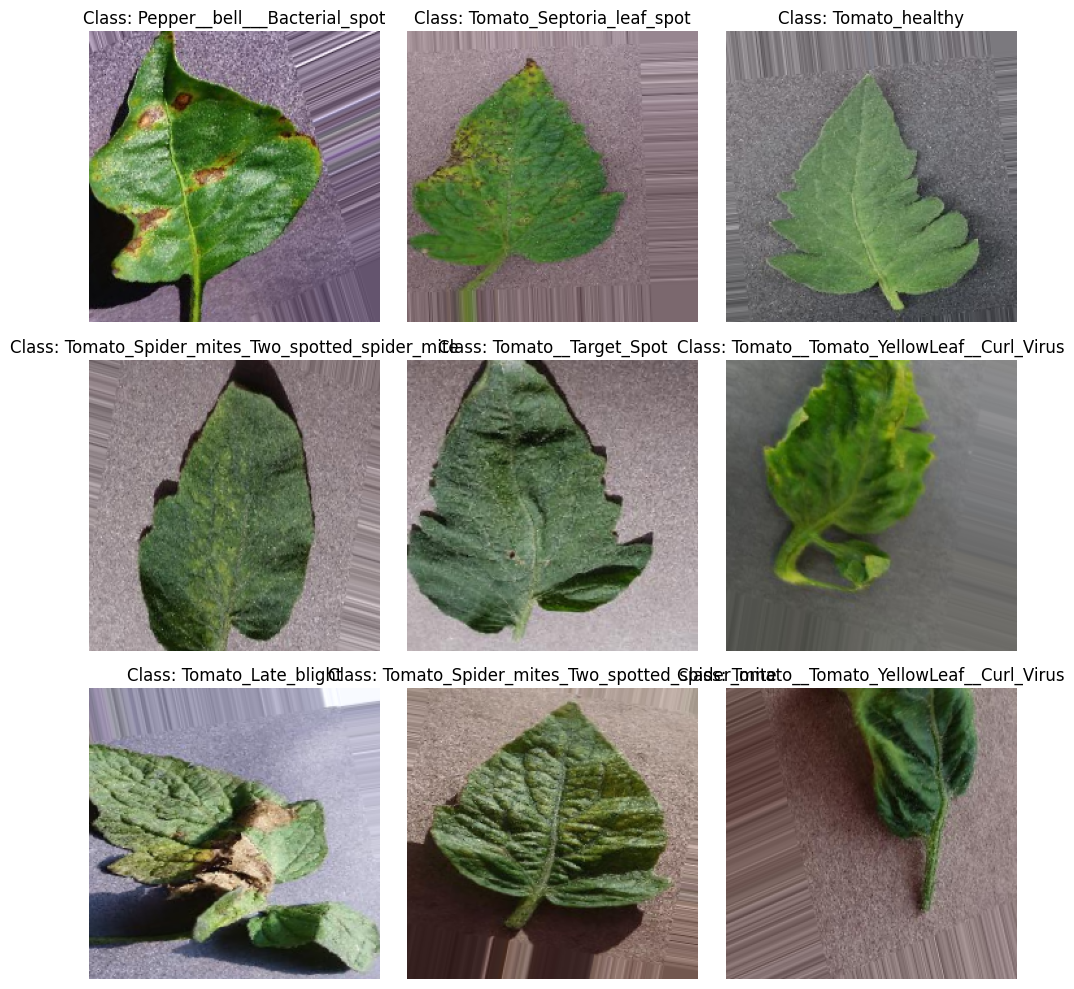

In [ ]:
#Checking the training images randomly
# Get one batch of training images
images, labels = next(train_generator)

# Plot first 9 images from that batch
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.axis("off")
    plt.title(f"Class: {list(train_generator.class_indices.keys())[np.argmax(labels[i])]}")
    plt.tight_layout()
plt.show()

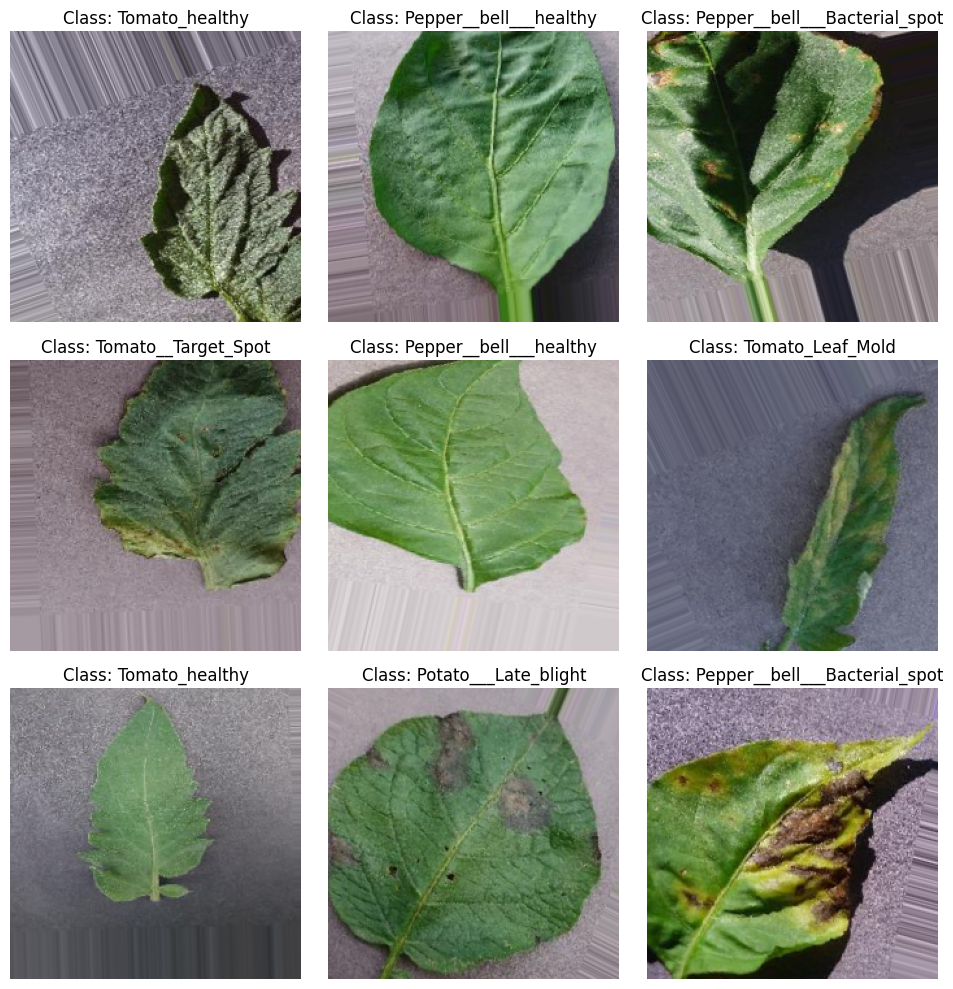

In [ ]:
#Checking the validation images randomly
images, labels = next(val_generator)
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    plt.axis("off")
    plt.title(f"Class: {list(val_generator.class_indices.keys())[np.argmax(labels[i])]}")
    plt.tight_layout()
plt.show()

In [ ]:
#Building the model using MobileNetV2
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)
base_model.trainable = False  # Freeze base layers

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,423,887 (9.25 MB)

 Trainable params: 165,903 (648.06 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
#defining callbacks (early stopping and saving the best model)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

best_model_path =  "/content/drive/MyDrive/PlantVillage/Best_Plant_Disease_Detector_MobileNetV2.h5"

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    verbose=1,
    mode='max',
    restore_best_weights=True
)

model_checkpoint = ModelCheckpoint(
    best_model_path,
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1,
    mode='max'
)

In [ ]:
#Training the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - accuracy: 0.6207 - loss: 1.2237
Epoch 1: val_accuracy improved from -inf to 0.84328, saving model to /content/drive/MyDrive/PlantVillage/Best_Plant_Disease_Detector_MobileNetV2.h5


517/517 ━━━━━━━━━━━━━━━━━━━━ 291s 530ms/step - accuracy: 0.6209 - loss: 1.2230 - val_accuracy: 0.8433 - val_loss: 0.4573
Epoch 2/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - accuracy: 0.8151 - loss: 0.5600
Epoch 2: val_accuracy improved from 0.84328 to 0.85832, saving model to /content/drive/MyDrive/PlantVillage/Best_Plant_Disease_Detector_MobileNetV2.h5


517/517 ━━━━━━━━━━━━━━━━━━━━ 248s 479ms/step - accuracy: 0.8151 - loss: 0.5599 - val_accuracy: 0.8583 - val_loss: 0.4181
Epoch 3/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step - accuracy: 0.8348 - loss: 0.4945
Epoch 3: val_accuracy improved from 0.85832 to 0.86803, saving model to /content/drive/MyDrive/PlantVillage/Best_Plant_Disease_Detector_MobileNetV2.h5


517/517 ━━━━━━━━━━━━━━━━━━━━ 248s 481ms/step - accuracy: 0.8348 - loss: 0.4945 - val_accuracy: 0.8680 - val_loss: 0.3801
Epoch 4/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step - accuracy: 0.8477 - loss: 0.4548
Epoch 4: val_accuracy did not improve from 0.86803
517/517 ━━━━━━━━━━━━━━━━━━━━ 245s 474ms/step - accuracy: 0.8477 - loss: 0.4548 - val_accuracy: 0.8651 - val_loss: 0.3811
Epoch 5/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 0.8517 - loss: 0.4325
Epoch 5: val_accuracy improved from 0.86803 to 0.88185, saving model to /content/drive/MyDrive/PlantVillage/Best_Plant_Disease_Detector_MobileNetV2.h5


517/517 ━━━━━━━━━━━━━━━━━━━━ 250s 484ms/step - accuracy: 0.8517 - loss: 0.4325 - val_accuracy: 0.8819 - val_loss: 0.3542
Epoch 6/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step - accuracy: 0.8582 - loss: 0.4054
Epoch 6: val_accuracy did not improve from 0.88185
517/517 ━━━━━━━━━━━━━━━━━━━━ 248s 480ms/step - accuracy: 0.8582 - loss: 0.4054 - val_accuracy: 0.8780 - val_loss: 0.3472
Epoch 7/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step - accuracy: 0.8624 - loss: 0.4098
Epoch 7: val_accuracy improved from 0.88185 to 0.89447, saving model to /content/drive/MyDrive/PlantVillage/Best_Plant_Disease_Detector_MobileNetV2.h5


517/517 ━━━━━━━━━━━━━━━━━━━━ 247s 478ms/step - accuracy: 0.8624 - loss: 0.4098 - val_accuracy: 0.8945 - val_loss: 0.3039
Epoch 8/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step - accuracy: 0.8731 - loss: 0.3682
Epoch 8: val_accuracy did not improve from 0.89447
517/517 ━━━━━━━━━━━━━━━━━━━━ 244s 473ms/step - accuracy: 0.8731 - loss: 0.3682 - val_accuracy: 0.8823 - val_loss: 0.3262
Epoch 9/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - accuracy: 0.8739 - loss: 0.3799
Epoch 9: val_accuracy did not improve from 0.89447
517/517 ━━━━━━━━━━━━━━━━━━━━ 245s 474ms/step - accuracy: 0.8739 - loss: 0.3799 - val_accuracy: 0.8780 - val_loss: 0.3329
Epoch 10/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - accuracy: 0.8751 - loss: 0.3699
Epoch 10: val_accuracy did not improve from 0.89447
517/517 ━━━━━━━━━━━━━━━━━━━━ 243s 469ms/step - accuracy: 0.8751 - loss: 0.3699 - val_accuracy: 0.8879 - val_loss: 0.3315
Epoch 10: early stopping
Restoring model weights from the end of the best epoch: 7.


--- Evaluating Model: /content/drive/MyDrive/PlantVillage/Best_Plant_Disease_Detector_MobileNetV2.h5 ---
129/129 ━━━━━━━━━━━━━━━━━━━━ 57s 405ms/step

--- Classification Report ---
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.05      0.05      0.05       199
                     Pepper__bell___healthy       0.07      0.08      0.08       295
                      Potato___Early_blight       0.05      0.04      0.05       200
                       Potato___Late_blight       0.05      0.04      0.05       200
                           Potato___healthy       0.00      0.00      0.00        30
                      Tomato_Bacterial_spot       0.11      0.10      0.11       425
                        Tomato_Early_blight       0.07      0.06      0.06       200
                         Tomato_Late_blight       0.10      0.11      0.10       381
                           Tomato_Leaf_Mold       0.05

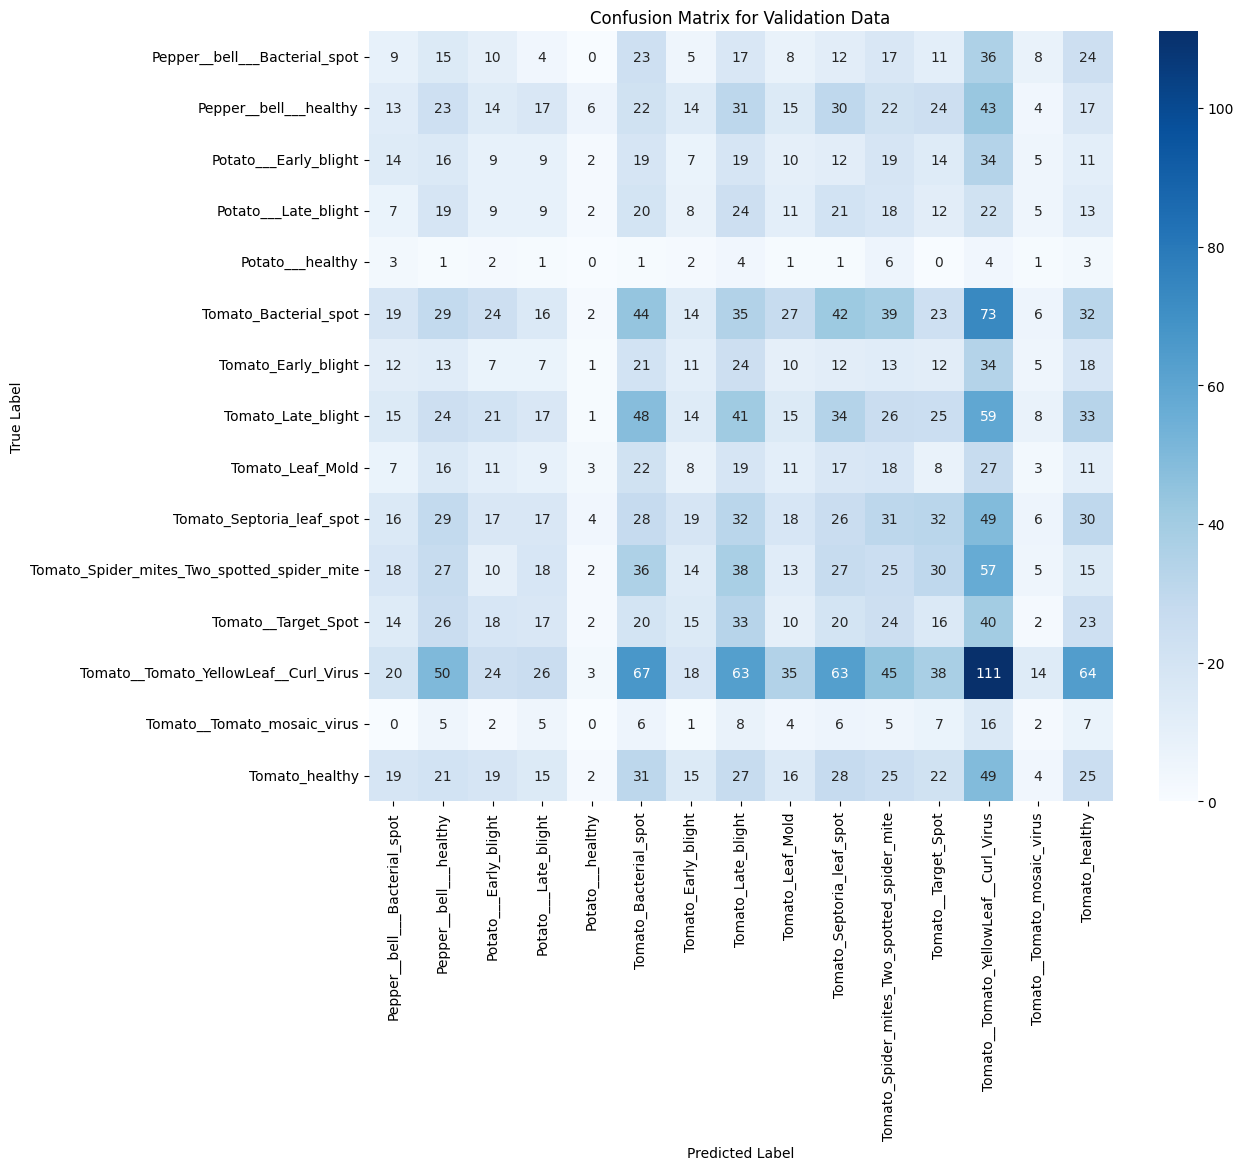

In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model

# 1. Loading the best model 

model_to_evaluate_path = "models/Best_Plant_Disease_Detector_MobileNetV2.h5"
model = load_model(model_to_evaluate_path)

print(f"--- Evaluating Model: {model_to_evaluate_path} ---")

#  2. Get Predictions from the Validation Generator 

val_generator.reset()

# Get the full list of predictions from the model
Y_pred = model.predict(
    val_generator,
    steps=val_generator.samples // val_generator.batch_size + 1, # Ensure all images are predicted
    verbose=1
)

# Get the class with the highest probability
y_pred = np.argmax(Y_pred, axis=1)

# Get the true class labels
y_true = val_generator.classes

# Get the human-readable class names
class_names = list(val_generator.class_indices.keys())

# 3. Print the Classification Report
print("\n--- Classification Report ---")
print(classification_report(y_true, y_pred, target_names=class_names))

#4. Plot the Confusion Matrix 
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(
    cm,
    annot=True,          # Show the numbers in each cell
    fmt='g',             # Use normal numbers (not scientific notation)
    cmap='Blues',        # Color scheme
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Validation Data')
plt.show()

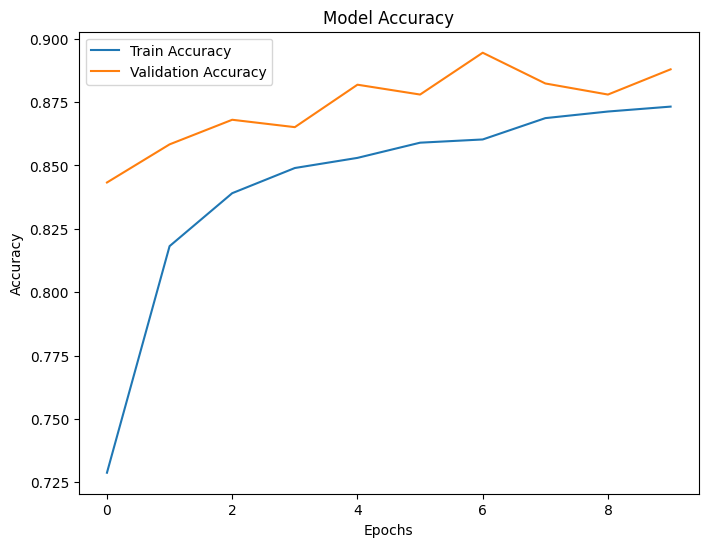

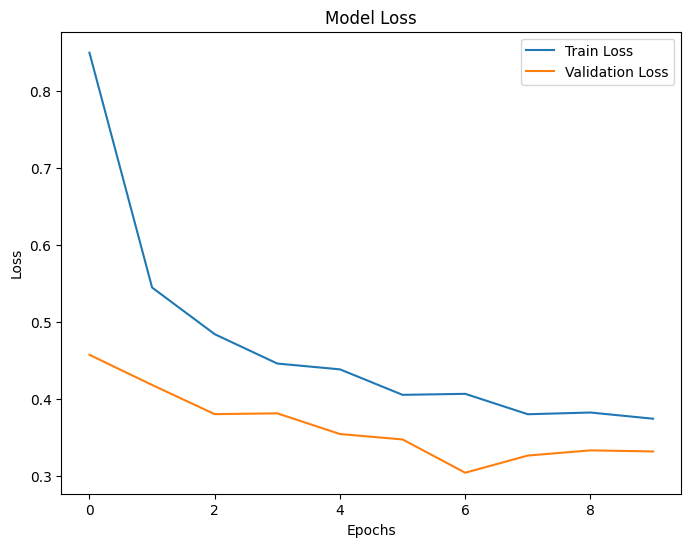

In [ ]:
#Plot Accuracy and Loss Graphs
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.models import load_model

# This is the same path you defined in your ModelCheckpoint
model_phase1_path = "/content/drive/MyDrive/PlantVillage/Best_Plant_Disease_Detector_MobileNetV2.h5"

print(f"--- Loading Best Model from Phase 1 ---\nPath: {model_phase1_path}\n")
model = load_model(model_phase1_path)
print("✅ Model loaded successfully.")

--- Loading Best Model from Phase 1 ---
Path: /content/drive/MyDrive/PlantVillage/Best_Plant_Disease_Detector_MobileNetV2.h5



✅ Model loaded successfully.


In [ ]:
print("--- Setting up Phase 2: Fine-Tuning ---")

# The 'base_model' is the first layer of your Sequential model
base_model = model.layers[0]

# Set the base model to be trainable
base_model.trainable = True

print(f"Total layers in the base model: {len(base_model.layers)}")

# We loop through the base model and re-freeze all layers *except* the top 20
for layer in base_model.layers[:-20]:
    layer.trainable = False

print("\n✅ Base model un-frozen. Only the top 20 layers are now trainable.")

--- Setting up Phase 2: Fine-Tuning ---
Total layers in the base model: 154

✅ Base model un-frozen. Only the top 20 layers are now trainable.


In [ ]:
from tensorflow.keras.optimizers import Adam

# We must use a very low learning rate for fine-tuning
new_learning_rate = 1e-5  # 0.00001

print(f"--- Re-compiling Model with Low Learning Rate: {new_learning_rate} ---")

model.compile(
    optimizer=Adam(learning_rate=new_learning_rate),  # Use the new tiny rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

--- Re-compiling Model with Low Learning Rate: 1e-05 ---


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,423,887 (9.25 MB)

 Trainable params: 1,371,983 (5.23 MB)

 Non-trainable params: 1,051,904 (4.01 MB)

In [ ]:
print("--- Defining New Callbacks for Phase 2 ---")

# Defined a NEW path for the fine-tuned model
finetuned_model_path = "/content/drive/MyDrive/PlantVillage/Finetuned_Plant_Disease_Detector.h5"

# same EarlyStopping settings
early_stopping_fine = EarlyStopping(
    monitor='val_accuracy',
    patience=3, # Stop if no improvement for 3 epochs
    verbose=1,
    mode='max',
    restore_best_weights=True
)

# A new checkpoint to save the new best model
model_checkpoint_fine = ModelCheckpoint(
    finetuned_model_path, # Saving to the NEW path
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1,
    mode='max'
)

print(f"✅ New callbacks defined. Fine-tuned model will be saved at: {finetuned_model_path}")

--- Defining New Callbacks for Phase 2 ---
✅ New callbacks defined. Fine-tuned model will be saved at: /content/drive/MyDrive/PlantVillage/Finetuned_Plant_Disease_Detector.h5


In [ ]:
print("--- 🚀 Starting Phase 2: Fine-Tuning ---")

# EarlyStopping will stop it sooner if it doesn't improve.
history_fine = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[early_stopping_fine, model_checkpoint_fine], # Using the NEW callbacks
    verbose=1
)

print("✅ Fine-tuning complete!")

--- 🚀 Starting Phase 2: Fine-Tuning ---
Epoch 1/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 0.6580 - loss: 1.1153
Epoch 1: val_accuracy improved from -inf to 0.88646, saving model to /content/drive/MyDrive/PlantVillage/Finetuned_Plant_Disease_Detector.h5


517/517 ━━━━━━━━━━━━━━━━━━━━ 278s 506ms/step - accuracy: 0.6582 - loss: 1.1146 - val_accuracy: 0.8865 - val_loss: 0.3448
Epoch 2/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step - accuracy: 0.8348 - loss: 0.4953
Epoch 2: val_accuracy did not improve from 0.88646
517/517 ━━━━━━━━━━━━━━━━━━━━ 243s 470ms/step - accuracy: 0.8348 - loss: 0.4953 - val_accuracy: 0.8838 - val_loss: 0.3351
Epoch 3/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - accuracy: 0.8579 - loss: 0.4205
Epoch 3: val_accuracy improved from 0.88646 to 0.89180, saving model to /content/drive/MyDrive/PlantVillage/Finetuned_Plant_Disease_Detector.h5


517/517 ━━━━━━━━━━━━━━━━━━━━ 244s 472ms/step - accuracy: 0.8579 - loss: 0.4204 - val_accuracy: 0.8918 - val_loss: 0.3199
Epoch 4/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step - accuracy: 0.8760 - loss: 0.3598
Epoch 4: val_accuracy improved from 0.89180 to 0.90053, saving model to /content/drive/MyDrive/PlantVillage/Finetuned_Plant_Disease_Detector.h5


517/517 ━━━━━━━━━━━━━━━━━━━━ 245s 474ms/step - accuracy: 0.8760 - loss: 0.3598 - val_accuracy: 0.9005 - val_loss: 0.2862
Epoch 5/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step - accuracy: 0.8951 - loss: 0.3190
Epoch 5: val_accuracy did not improve from 0.90053
517/517 ━━━━━━━━━━━━━━━━━━━━ 245s 474ms/step - accuracy: 0.8951 - loss: 0.3190 - val_accuracy: 0.8991 - val_loss: 0.2897
Epoch 6/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - accuracy: 0.8965 - loss: 0.2994
Epoch 6: val_accuracy improved from 0.90053 to 0.90927, saving model to /content/drive/MyDrive/PlantVillage/Finetuned_Plant_Disease_Detector.h5


517/517 ━━━━━━━━━━━━━━━━━━━━ 244s 473ms/step - accuracy: 0.8966 - loss: 0.2994 - val_accuracy: 0.9093 - val_loss: 0.2574
Epoch 7/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - accuracy: 0.9074 - loss: 0.2768
Epoch 7: val_accuracy improved from 0.90927 to 0.92115, saving model to /content/drive/MyDrive/PlantVillage/Finetuned_Plant_Disease_Detector.h5


517/517 ━━━━━━━━━━━━━━━━━━━━ 244s 472ms/step - accuracy: 0.9074 - loss: 0.2768 - val_accuracy: 0.9212 - val_loss: 0.2345
Epoch 8/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - accuracy: 0.9102 - loss: 0.2671
Epoch 8: val_accuracy did not improve from 0.92115
517/517 ━━━━━━━━━━━━━━━━━━━━ 243s 471ms/step - accuracy: 0.9102 - loss: 0.2671 - val_accuracy: 0.9202 - val_loss: 0.2331
Epoch 9/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step - accuracy: 0.9104 - loss: 0.2611
Epoch 9: val_accuracy improved from 0.92115 to 0.92552, saving model to /content/drive/MyDrive/PlantVillage/Finetuned_Plant_Disease_Detector.h5


517/517 ━━━━━━━━━━━━━━━━━━━━ 245s 474ms/step - accuracy: 0.9104 - loss: 0.2611 - val_accuracy: 0.9255 - val_loss: 0.2123
Epoch 10/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - accuracy: 0.9198 - loss: 0.2355
Epoch 10: val_accuracy did not improve from 0.92552
517/517 ━━━━━━━━━━━━━━━━━━━━ 243s 470ms/step - accuracy: 0.9198 - loss: 0.2355 - val_accuracy: 0.9241 - val_loss: 0.2152
Restoring model weights from the end of the best epoch: 9.
✅ Fine-tuning complete!


--- Plotting Combined Accuracy and Loss ---


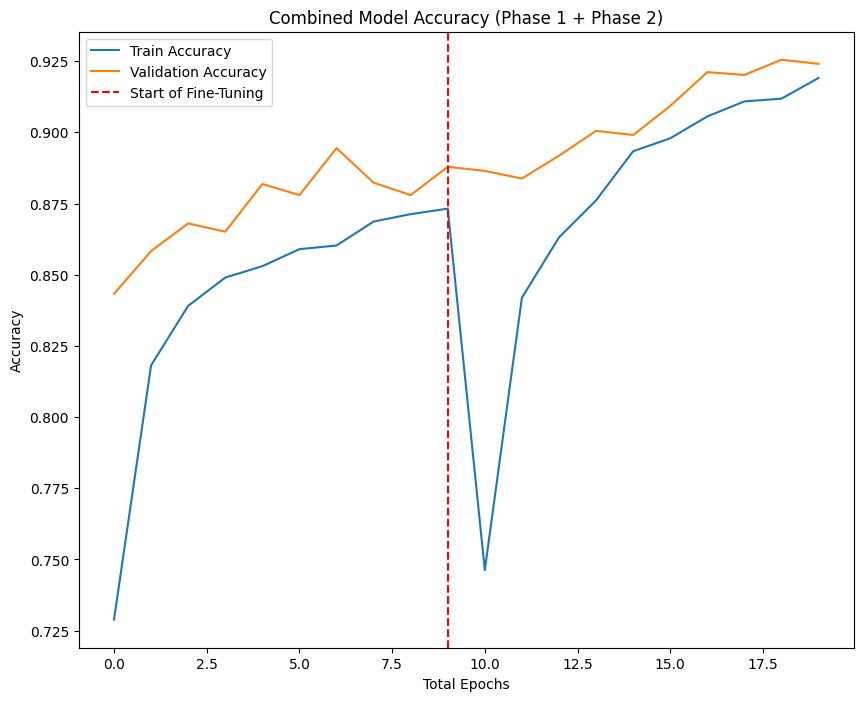

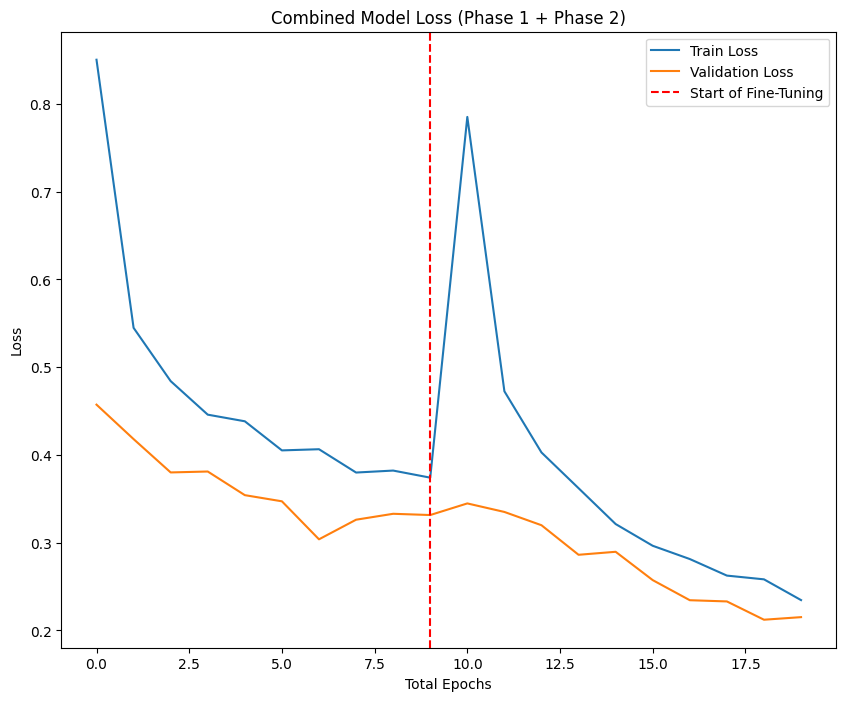

In [ ]:
print("--- Plotting Combined Accuracy and Loss ---")

# Combining the history from Phase 1 (variable 'history') and Phase 2 ('history_fine')
acc = history.history['accuracy'] + history_fine.history['accuracy']
val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']
loss = history.history['loss'] + history_fine.history['loss']
val_loss = history.history['val_loss'] + history_fine.history['val_loss']

# Finding the point where Phase 1 ended
phase1_epochs = len(history.history['accuracy'])

# Plot for combined accuracy
plt.figure(figsize=(10, 8))
plt.plot(acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.axvline(x=phase1_epochs - 1, color='red', linestyle='--', label='Start of Fine-Tuning')
plt.title('Combined Model Accuracy (Phase 1 + Phase 2)')
plt.xlabel('Total Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot for combined loss
plt.figure(figsize=(10, 8))
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.axvline(x=phase1_epochs - 1, color='red', linestyle='--', label='Start of Fine-Tuning')
plt.title('Combined Model Loss (Phase 1 + Phase 2)')
plt.xlabel('Total Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

--- Evaluating Model: /content/drive/MyDrive/PlantVillage/Finetuned_Plant_Disease_Detector.h5 ---
129/129 ━━━━━━━━━━━━━━━━━━━━ 57s 409ms/step

--- Classification Report ---
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.04      0.04      0.04       199
                     Pepper__bell___healthy       0.08      0.08      0.08       295
                      Potato___Early_blight       0.06      0.07      0.06       200
                       Potato___Late_blight       0.07      0.07      0.07       200
                           Potato___healthy       0.06      0.07      0.07        30
                      Tomato_Bacterial_spot       0.10      0.10      0.10       425
                        Tomato_Early_blight       0.02      0.02      0.02       200
                         Tomato_Late_blight       0.11      0.10      0.11       381
                           Tomato_Leaf_Mold       0.06      0

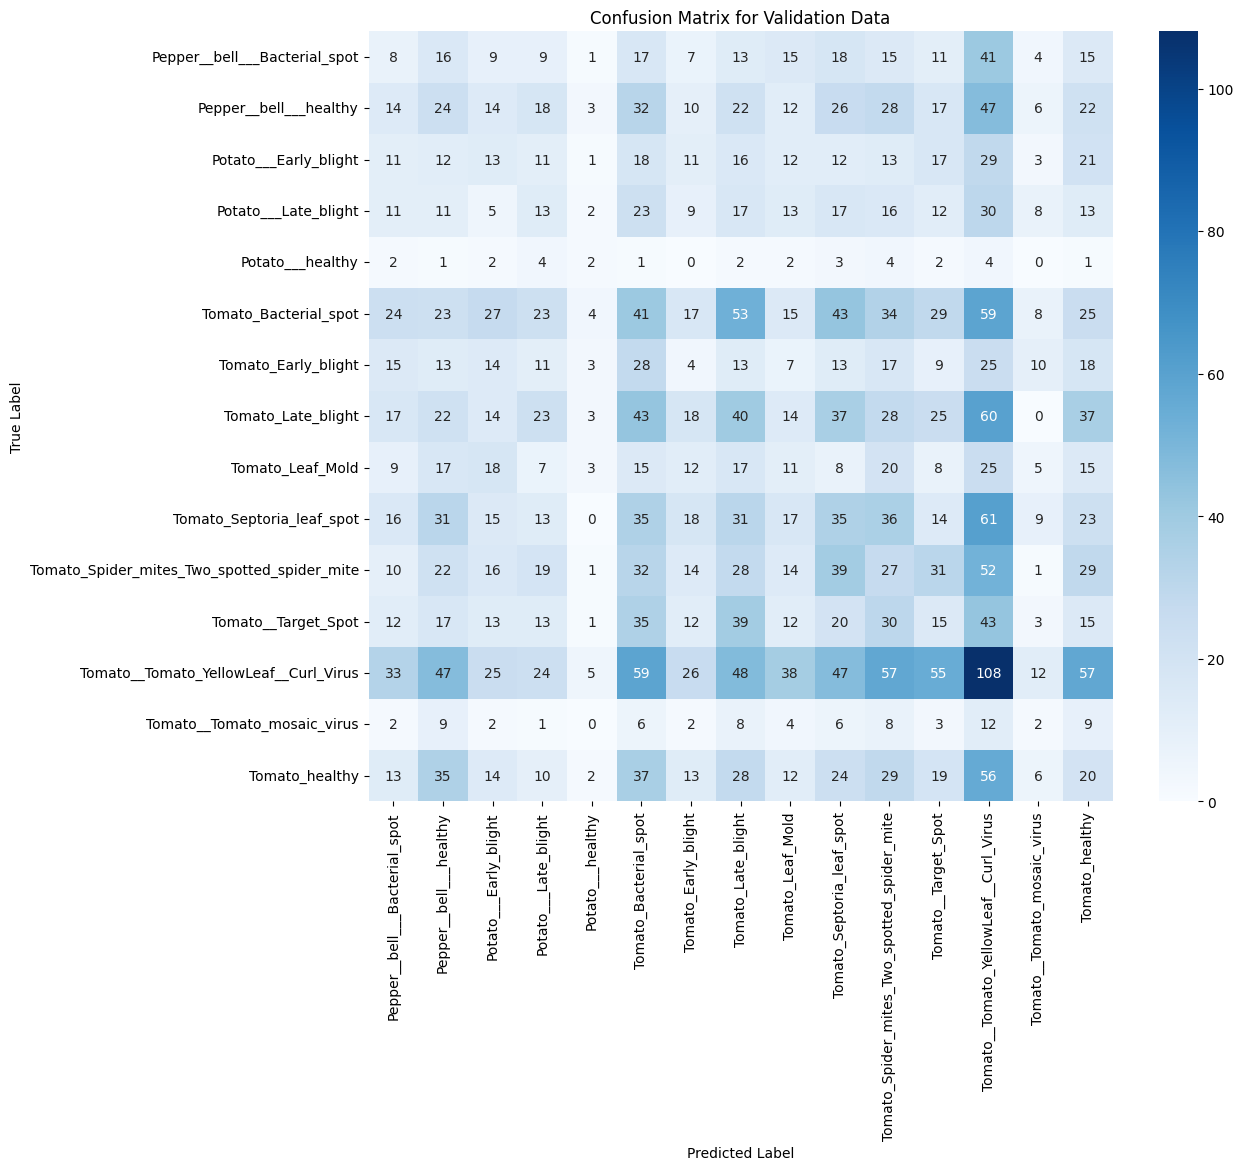

In [ ]:

#  1. Load the best model 
model_to_evaluate_path = "models/Finetuned_Plant_Disease_Detector.h5"
model = load_model(model_to_evaluate_path)

print(f"--- Evaluating Model: {model_to_evaluate_path} ---")

# 2. Get Predictions from the Validation Generator 
val_generator.reset()

# Get the full list of predictions from the model
Y_pred = model.predict(
    val_generator,
    steps=val_generator.samples // val_generator.batch_size + 1, # Ensure all images are predicted
    verbose=1
)

# Get the class with the highest probability
y_pred = np.argmax(Y_pred, axis=1)

# Get the true class labels
y_true = val_generator.classes

# Get the human-readable class names
class_names = list(val_generator.class_indices.keys())

# 3. Print the Classification Report 
print("\n--- Classification Report ---")
print(classification_report(y_true, y_pred, target_names=class_names))

# 4. Plot the Confusion Matrix 
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(
    cm,
    annot=True,          # Show the numbers in each cell
    fmt='g',             # Use normal numbers (not scientific notation)
    cmap='Blues',        # Color scheme
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Validation Data')
plt.show()